In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


### About YULU : 

**Electrics Bicyles Provider for Local Use. It basically provides a two-wheeler electric vehicle services in Bengaluru, Mumbai, Navi Mumbai, Delhi and Gurugram. Yulu operates 25,000 dockless shared EVs and has 4 million users!**




[![Yulu e-bike](https://imgk.timesnownews.com/story/1557482863-Yulu_e-bike.jpeg?tr=w-1000,h-650,fo-auto)](http://)
****

### About The Data

This dataset provides insights into the usage patterns of YULU bike sharing services. It includes a variety of factors such as weather conditions, time, and user type, which could influence bike rental behaviors.

**Target Columns**

 - Casual: Count of Casual Users 
 - Registered: Count of Registered Users
 - Count : Casual + Registered

**Note on Registration:** YULU's policy requires a refundable security deposit of Rs 100 for registration. This aspect could influence user decisions to register and use the service regularly.

**Temperature Columns**

  - temp: Ambient temperature as measured by standard devices, in Celsius.
  - atemp: 'Feels like' temperature, considering factors like humidity and wind, in Celsius.

**Column Profiling:**

 - datetime: Date and time of the bike rental.

 - season: Categorical variable representing the season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

 - holiday: Indicates if the day is a public holiday (1: Holiday, 0: Non-holiday).

 - workingday: Identifies working days (1: Working day, 0: Weekend or holiday).

 - weather: Categorical variable representing weather conditions:
  - 1: Clear, few clouds, partly cloudy.
  - 2: Mist + cloudy, mist + broken clouds, mist + few clouds.
  - 3: Light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds.
  - 4: Heavy rain + ice pellets + thunderstorm + mist, snow + fog.
  
 - humidity: Relative humidity in percentage.

 - windspeed: Wind speed in km/h.

 - count: Total count of rented bikes, including both casual and registered users.
****

### Goal:
1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?✅
2. Select an appropriate test to check whether:
    
    - Working Day has effect on number of electric cycles rented✅

    - No. of cycles rented similar or different in different seasons✅

    - No. of cycles rented similar or different in different weather✅

    - Weather is dependent on season (check between 2 predictor variable)✅
****

### Plan
1. Before finding out some insights lets focus on checking null value, outliers and prepare overall data, also we delete datetime column by adding the [year,month] columns

2. Our main focus will be on comparing other columns with these 3 columns [casual,register,count] because they explore about the count of users which is the main focus of Yulu's 
3. We will compare and try to find relation between variables
4. At each set of visualization we provide a "short analysis (SA)" to understand what the visualization want to say
5. After that we will start our main part that is Hypothesis Testing
6. We have to use various test to check wether we have to Reject H0 or Accept H0
7. So after solving each problem we markdown the final Answer

**Note : Please feel free to suggest any modifications, improvements, or corrections. I'm open to learning and improving** 
****

### Steps:
1. Data Exploration & EDA ✅
2. Relation Between Independent and Dependent Variables✅
3. Hypothesis Testing (Shapiro, Levene , Whiteneyuu, Kruskal's Wallis, Dunn's Test)✅
****

### Reference:
   - https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance
   - https://www.kaggle.com/code/ekrembayar/a-b-testing-step-by-step-hypothesis-testing
   - https://www.statology.org/dunns-test/
   ****

### Short Forms
 - Short Analysis : SA
 ****

In [2]:
# importing libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Hypothesis Testing
# -----------------------------------
from scipy.stats import shapiro
import scipy.stats as stats

# warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format


# Data Exploration & EDA

In [3]:
data = pd.read_csv("../yulu_bike_sharing_dataset.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.8400,14.3950,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# Extracting Year and month from datetime column and then deleting datetime
data["datetime"] = pd.to_datetime(data["datetime"])
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month

In [6]:
# remove column
data = data.drop(columns = ["datetime"])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [8]:
def year_month(data,y,m):
    
    a = data[y].value_counts()
    b = data[m].value_counts()
    print("Year Value Counts:",a,"\n")
    print("***************************")
    print("Month Value Counts:",b)
year_month(data,"year","month")

Year Value Counts: 2012    5464
2011    5422
Name: year, dtype: int64 

***************************
Month Value Counts: 5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64


In [9]:
# Checking for NULL Values
data.isnull().sum()
# No NULL Values

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
dtype: int64

In [10]:
# Checking Overall Stats
# Less Chances of Outliers still we will check using box-plots
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0000,2.5066,1.1162,1.0000,2.0000,3.0000,4.0000,4.0000
holiday,10886.0000,0.0286,0.1666,0.0000,0.0000,0.0000,0.0000,1.0000
workingday,10886.0000,0.6809,0.4662,0.0000,0.0000,1.0000,1.0000,1.0000
weather,10886.0000,1.4184,0.6338,1.0000,1.0000,1.0000,2.0000,4.0000
temp,10886.0000,20.2309,7.7916,0.8200,13.9400,20.5000,26.2400,41.0000
atemp,10886.0000,23.6551,8.4746,0.7600,16.6650,24.2400,31.0600,45.4550
humidity,10886.0000,61.8865,19.2450,0.0000,47.0000,62.0000,77.0000,100.0000
windspeed,10886.0000,12.7994,8.1645,0.0000,7.0015,12.9980,16.9979,56.9969
casual,10886.0000,36.0220,49.9605,0.0000,4.0000,17.0000,49.0000,367.0000
registered,10886.0000,155.5522,151.0390,0.0000,36.0000,118.0000,222.0000,886.0000


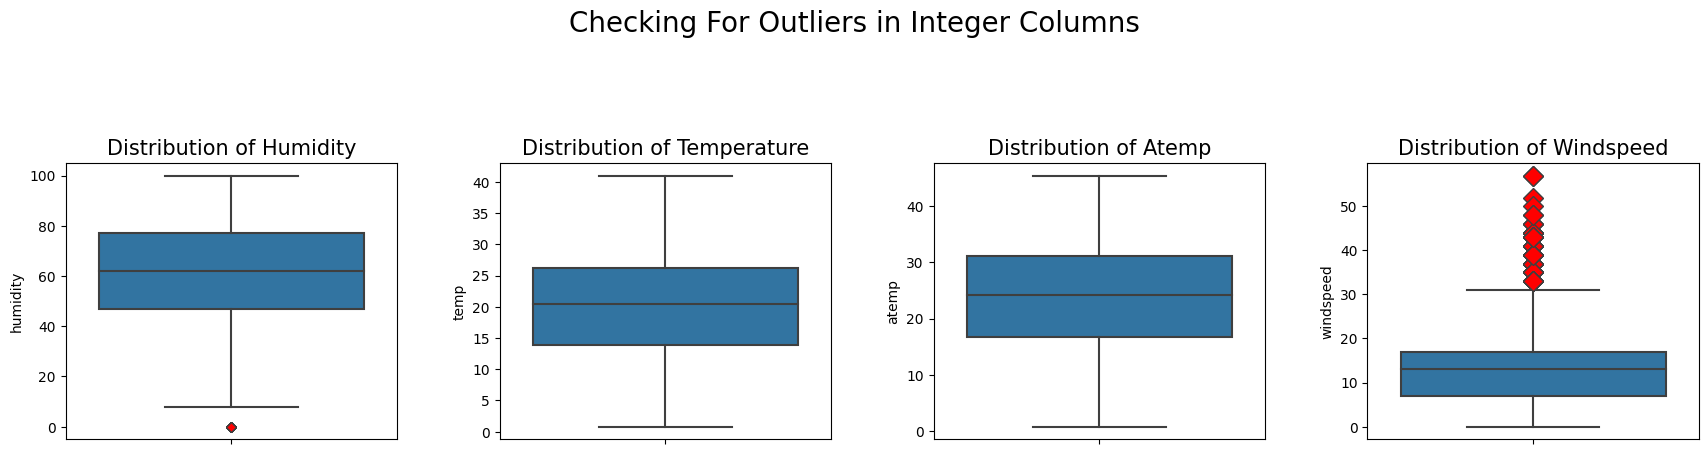

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.boxplot(y=data['humidity'], ax=axes[0],flierprops=dict(markerfacecolor='red', marker='D'))
sns.boxplot(y=data['temp'], ax=axes[1],flierprops=dict(markerfacecolor='red', marker='D'))
sns.boxplot(y=data['atemp'],ax=axes[2],flierprops=dict(markerfacecolor='red', marker='D'))
sns.boxplot(y=data['windspeed'], ax=axes[3],fliersize=10,flierprops=dict(markerfacecolor='red', marker='D'))

plt.suptitle("Checking For Outliers in Integer Columns",fontsize = 20)
axes[0].set_title("Distribution of Humidity",fontsize = 15)
axes[1].set_title("Distribution of Temperature",fontsize = 15)
axes[2].set_title("Distribution of Atemp",fontsize = 15)
axes[3].set_title("Distribution of Windspeed",fontsize = 15)

plt.tight_layout(pad=4)
plt.show()


### SA 1:
1. There are some outliers in columns [Humidity, Windspeed] but (according to me) these outliers wont harm any future insights so we are going to continue, if required we will remove them later!

**I think we are done with enough of insights and we are ready to move towards next part!!!**

Note : If I have missed something do let me know in the comments

### Problem : Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
**Answer: [season,weather,workingday,windspeed,temp]**
****

# Hypothesis Testing


Select an appropriate test to check whether:

Working Day has effect on number of electric cycles rented

No. of cycles rented similar or different in different seasons

No. of cycles rented similar or different in different weather

Weather is dependent on season (check between 2 predictor variable)

Steps:

1. Define A and B groups
2. Describe Null Hypothesis and Alternate Hypothesis
3. Normality Test(Shapiro Test), Levene(equal variance or unequal variance) or Mannwhitneyu Test (Non parametric Test)
4. Kruskal Test for multiple groups 
5. Dunn's Test if required
****

### Problem 2 : No. of cycles rented similar or different in different seasons

**Null Hypothesis H0: Number of cycles are similar in different seasons**

**Alternate Hypothesis H1: Number of cycles are different in different seasons**


- As season column contains different groups such as **season (1: spring, 2: summer, 3: fall, 4: winter)**
- So we will use Kruskal-Wallis Test by ranks, which ranks all the data points from all the groups and combine them. If there are ties then they are given average rank
- Calculate Test Statistic, p-value and compare with alpha=0.05
- If p-value > 0.05 -> Fail to Reject Null Hypothesis and p-value < 0.05 Reject Null Hypothesis


In [12]:
def kruskal_wallis(data,group,target):

    unique_grps = data[group].unique()
    samples = [data[data[group] == g][target] for g in unique_grps]
    
    
    # Kruskal Wallis Test
    stat,p_value = stats.kruskal(*samples)
    
    result = pd.DataFrame({
        "Test Type": ["Non Parametric"],
        "Kruskal Statistic": [stat],
        "P-Value": [p_value],
        "Hypothesis": ["Strong Evidence to Reject Null Hypothesis" if p_value < 0.05 else "No Evidence to Reject Null Hypothesis"],
        "Comment": ["Different distributions" if p_value < 0.05 else "No evidence of different distributions"]
    })

    return result


In [13]:
kruskal_wallis(data,"season","count")

,Test Type,Kruskal Statistic,P-Value,Hypothesis,Comment
0,Non Parametric,699.6669,0.0000,Strong Evidence to Reject Null Hypothesis,Different distributions


As above test results in Different Distribution so, we now try to find the specific seasons that differ from each other!

- To find above groups we conduct an Post-hoc Analysis which provides us with the groups 

For that we conduct the **Dunn's Test** 
****
**Dunn Test :**

   - If the results of a "Kruskal-Wallis" test are statistically significant, then it’s appropriate to conduct Dunn’s Test to determine exactly which groups are different. 
   - Dunn’s Test performs pairwise comparisons between each independent group and tells you which groups are statistically significantly different at some level of αlpha.
 
Whenever we make multiple comparisons at once, it is important to control the **family-wise error rate**. One way to do so is to adjust the p-values that results from the multiple comparisons.There are several ways to adjust the p-values, but the two most common adjustment methods are:

**1. The Bonferroni Adjustment**✅

**Adjusted p-value = p*m**

**where:**

p: The original p-value

m: The total number of comparisons being made

**2. The Sidak Adjustment**

**Adjusted p-value = 1 – (1-p)m**

**where:**

p: The original p-value

m: The total number of comparisons being made
  

**Note**: Above Info is taken from https://www.statology.org/dunns-test/

In [16]:
!pip install scikit_posthocs

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 1.4 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.9 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.9 MB 1.5 MB/s eta 0:00:07
    --------------------------------------- 0.2/9.9 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.5/9.9 MB 2.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/9.9 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/9.9 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.9 MB 4.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.2/9.9 MB 5.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 6.9 MB/s eta 0:00:02
   ---------------- ----------------------- 4.1/9.9 MB 8.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.1/9.9 MB 9.6 MB/s eta 0:00:01
   ----------------

In [16]:
import scikit_posthocs as sp
def dunn_posthoc_test(data, group, target):
    # Pairwise post-hoc test after Kruskal
    pairwise_results = sp.posthoc_dunn(data, val_col=target, group_col=group, p_adjust='bonferroni')

    return pairwise_results

posthoc_results = dunn_posthoc_test(data, "season", "count")

print(posthoc_results.reset_index())


   index      1      2      3      4
0      1 1.0000 0.0000 0.0000 0.0000
1      2 0.0000 1.0000 0.0002 0.1782
2      3 0.0000 0.0002 1.0000 0.0000
3      4 0.0000 0.1782 0.0000 1.0000


In [ ]:
# 转换为DataFrame
df = pd.DataFrame(data)


posthoc_results.to_csv('dunn_test_results.csv', index=False)

**Pairs of Groups that are causing the Difference are.....**
1. Group 1 and Group 2
2. Group 1 and Group 3
3. Group 1 and Group 4
4. Group 2 and Group 3
5. Group 3 and Group 4


**All the Pairs who have values less than aplha = 0.05 are leading to the difference**


**Answer 2 : Number of cycles rented are different in different seasons**  
****

### Problem 3: No. of cycles rented similar or different in different weather

**Null Hypothesis H0 : Number of cycles rented are similar in different weather**

**Alternate Hypothesis H1 : Number of cycles are different in different weather**


Weather: 

1: Clear, Few clouds, partly cloudy, partly cloudy 

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Just like above we will perform Kruskal-Wallis Test**

In [19]:
kruskal_wallis(data,"weather","count")

# 转换为DataFrame
df = pd.DataFrame(data)
# 进行检验并获取结果
result_df = kruskal_wallis(data,"weather","count")

# 将结果保存到CSV文件
result_df.to_csv('weather.csv', index=False)


In [20]:
dunn_posthoc_test(data,"weather","count")


# 将结果重置索引
posthoc_results = posthoc_results.reset_index()

# 将结果保存到CSV文件
posthoc_results.to_csv('dunn_test_results.csv', index=False)

print("结果已保存到 dunn_test_results.csv")

结果已保存到 dunn_test_results.csv


**Yup, due to low amount of data of Heavy Rain it might lead to some change in result but still the groups that led the difference are:**

1. Group 1 and Group 2
2. Group 1 and Group 3
3. Group 2 and Group 3

**Answer 3 : Number of cycles rented are different in different weather**
****